## Предобработка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor

импорт библиотек

In [4]:
try:
    arc_new = pd.read_csv('/mnt/c/Users/pigal/Jupyter/ind_data/data_arc_new.csv')
    bulk_new = pd.read_csv('/mnt/c/Users/pigal/Jupyter/ind_data/data_bulk_new.csv')
    bulk_time_new = pd.read_csv('/mnt/c/Users/pigal/Jupyter/ind_data/data_bulk_time_new.csv')
    gas_new = pd.read_csv('/mnt/c/Users/pigal/Jupyter/ind_data/data_gas_new.csv')
    temp_new = pd.read_csv('/mnt/c/Users/pigal/Jupyter/ind_data/data_temp_new.csv')
    wire_new = pd.read_csv('/mnt/c/Users/pigal/Jupyter/ind_data/data_wire_new.csv')
    wire_time_new = pd.read_csv('/mnt/c/Users/pigal/Jupyter/ind_data/data_wire_time_new.csv')

except:
    arc_new = pd.read_csv('/datasets/data_arc_new.csv')
    bulk_new = pd.read_csv('/datasets/data_bulk_new.csv')
    bulk_time_new = pd.read_csv('/datasets/data_bulk_time_new.csv')
    gas_new = pd.read_csv('/datasets/data_gas_new.csv')
    temp_new = pd.read_csv('/datasets/data_temp_new.csv')
    wire_new = pd.read_csv('/datasets/data_wire_new.csv')
    wire_time_new = pd.read_csv('/datasets/data_wire_time_new.csv')

импорт данных

## Анализ данных

данные об электродах

In [5]:
arc_new.info()
display(arc_new.sample(5))
#arc_new.corr()
arc_new.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
7319,1588,2019-07-02 02:20:09,2019-07-02 02:21:04,0.444764,0.315227
13229,2879,2019-08-24 17:49:37,2019-08-24 17:52:58,0.649843,0.509748
2923,638,2019-05-27 18:07:47,2019-05-27 18:09:18,1.241074,0.834739
12640,2747,2019-08-19 20:17:54,2019-08-19 20:20:24,0.974501,0.635657
8831,1921,2019-07-19 09:35:52,2019-07-19 09:37:44,0.815795,0.601233


key                      3214
Начало нагрева дугой    14876
Конец нагрева дугой     14876
Активная мощность       13846
Реактивная мощность     14707
dtype: int64

In [6]:
arc_new[['Активная мощность','Реактивная мощность']].corr()

,Активная мощность,Реактивная мощность
Активная мощность,1.000000,0.031164
Реактивная мощность,0.031164,1.000000


In [7]:
arc_new = arc_new.drop(arc_new[arc_new['Реактивная мощность'] < 0].index)

<AxesSubplot:>

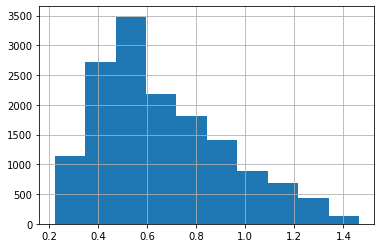

In [8]:
arc_new['Активная мощность'].hist()

In [9]:
arc_new[['Активная мощность','Реактивная мощность']].corr()

,Активная мощность,Реактивная мощность
Активная мощность,1.000000,0.966373
Реактивная мощность,0.966373,1.000000


данные о сыпучих материалах

In [10]:
bulk_new.info()
display(bulk_new.sample(5))
bulk_new.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
2449,2541,NaN,NaN,NaN,NaN,NaN,170.0,NaN,NaN,NaN,NaN,16.0,NaN,NaN,248.0,108.0
3054,3163,NaN,NaN,284.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,316.0,NaN,198.0,214.0
2244,2325,NaN,NaN,NaN,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165.0,NaN
1835,1897,NaN,NaN,89.0,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,98.0,100.0
825,860,NaN,NaN,109.0,NaN,NaN,173.0,NaN,NaN,NaN,NaN,NaN,313.0,NaN,325.0,100.0


key        3129
Bulk 1       47
Bulk 2       15
Bulk 3      278
Bulk 4      206
Bulk 5       55
Bulk 6      205
Bulk 7       25
Bulk 8        1
Bulk 9       10
Bulk 10      77
Bulk 11     101
Bulk 12     331
Bulk 13      14
Bulk 14     284
Bulk 15     156
dtype: int64

In [11]:
print(bulk_new.max())
print(bulk_new.median())
bulk_new.min()

key        3241.0
Bulk 1      185.0
Bulk 2      325.0
Bulk 3      454.0
Bulk 4      281.0
Bulk 5      603.0
Bulk 6      503.0
Bulk 7      772.0
Bulk 8       49.0
Bulk 9      147.0
Bulk 10     159.0
Bulk 11     313.0
Bulk 12    1849.0
Bulk 13     305.0
Bulk 14     636.0
Bulk 15     405.0
dtype: float64
key        1622.0
Bulk 1       31.0
Bulk 2      251.5
Bulk 3       97.5
Bulk 4      102.0
Bulk 5       86.0
Bulk 6      100.0
Bulk 7      298.0
Bulk 8       49.0
Bulk 9       68.0
Bulk 10      86.5
Bulk 11      64.0
Bulk 12     208.0
Bulk 13     155.5
Bulk 14     151.0
Bulk 15     160.0
dtype: float64


key          1.0
Bulk 1      10.0
Bulk 2     228.0
Bulk 3       6.0
Bulk 4      12.0
Bulk 5      11.0
Bulk 6      17.0
Bulk 7      47.0
Bulk 8      49.0
Bulk 9      63.0
Bulk 10     24.0
Bulk 11      8.0
Bulk 12     53.0
Bulk 13    151.0
Bulk 14     16.0
Bulk 15      1.0
dtype: float64

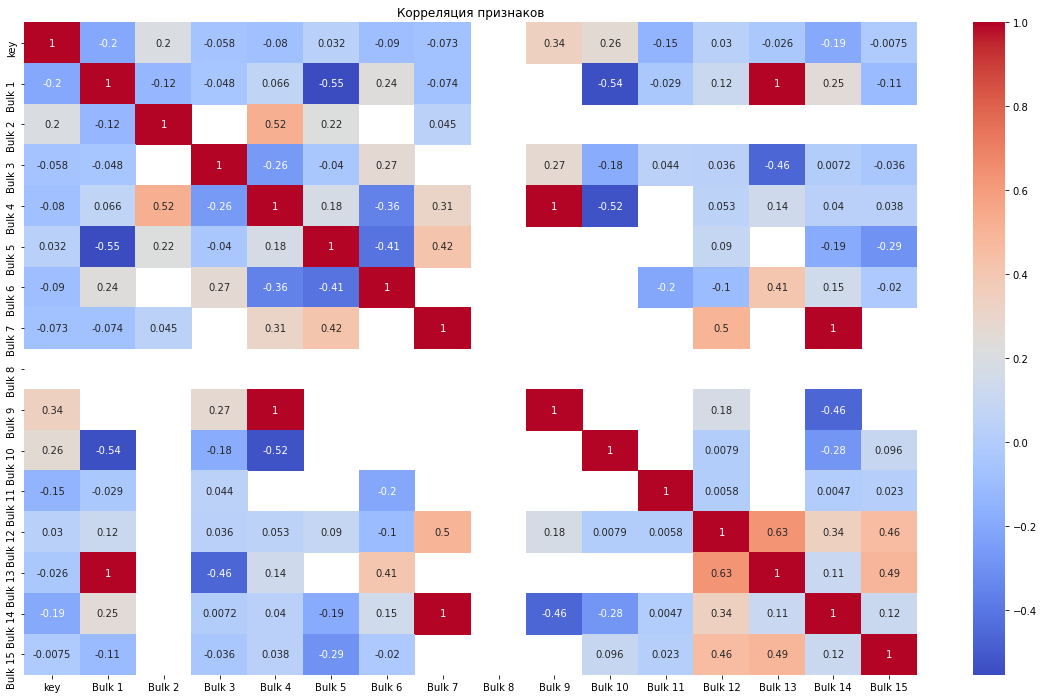

In [12]:
plt.figure(figsize=(20, 12))
plt.title('Корреляция признаков')
sns.heatmap(bulk_new.corr(method='spearman'), annot = True, cmap="coolwarm")
plt.show()

данные об времени подачи сыпучих материалов.

In [13]:
bulk_time_new.info()
display(bulk_time_new.sample(5))
bulk_time_new.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
2506,2601,NaN,NaN,2019-08-14 11:23:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-14 11:17:44,2019-08-14 11:11:40
1281,1332,NaN,NaN,NaN,2019-06-22 12:30:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-22 12:30:59,NaN,2019-06-22 12:30:59,2019-06-22 12:21:55
319,341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-16 15:59:47,NaN,2019-05-16 16:14:34,2019-05-16 16:14:34
1989,2060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-25 14:52:25,NaN
1806,1868,NaN,NaN,2019-07-11 18:25:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-11 18:25:47,NaN


key        3129
Bulk 1      252
Bulk 2       22
Bulk 3     1298
Bulk 4     1014
Bulk 5       77
Bulk 6      576
Bulk 7       25
Bulk 8        1
Bulk 9       19
Bulk 10     176
Bulk 11     177
Bulk 12    2450
Bulk 13      18
Bulk 14    2806
Bulk 15    2248
dtype: int64

Данные о температуре

In [14]:
temp_new.info()
display(temp_new.sample(5))
temp_new.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


,key,Время замера,Температура
10354,1853,2019-07-11 04:06:39,1600.0
5541,987,2019-06-10 13:49:59,1598.0
245,45,2019-05-05 02:36:37,1538.0
8993,1607,2019-07-02 18:17:35,1575.0
8762,1567,2019-07-01 09:55:30,1625.0


key              3216
Время замера    18092
Температура       172
dtype: int64

In [15]:
temp_new.min()

key                               1
Время замера    2019-05-03 11:02:04
Температура                  1191.0
dtype: object

<AxesSubplot:>

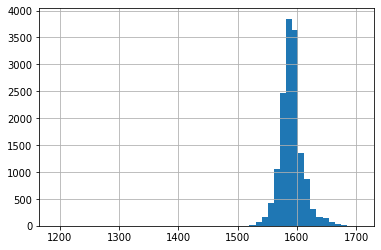

In [16]:
temp_new['Температура'].hist(bins =50)

In [17]:
temp_new = temp_new.drop(temp_new[temp_new['Температура']<1450].index)

<AxesSubplot:>

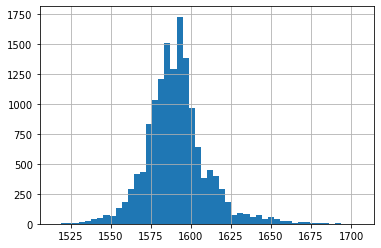

In [18]:
temp_new['Температура'].hist(bins =50)

данные о проволочных материалах (объём)

In [19]:
wire_new.info()
display(wire_new.sample(5))
wire_new.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
2526,2659,64.253281,19.03096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,99,70.106400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2178,2289,84.215042,17.10072,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1634,1714,110.073601,9.10832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3072,3233,107.147033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


key       3081
Wire 1    2251
Wire 2     713
Wire 3      56
Wire 4      14
Wire 5       1
Wire 6      69
Wire 7      10
Wire 8      13
Wire 9      25
dtype: int64

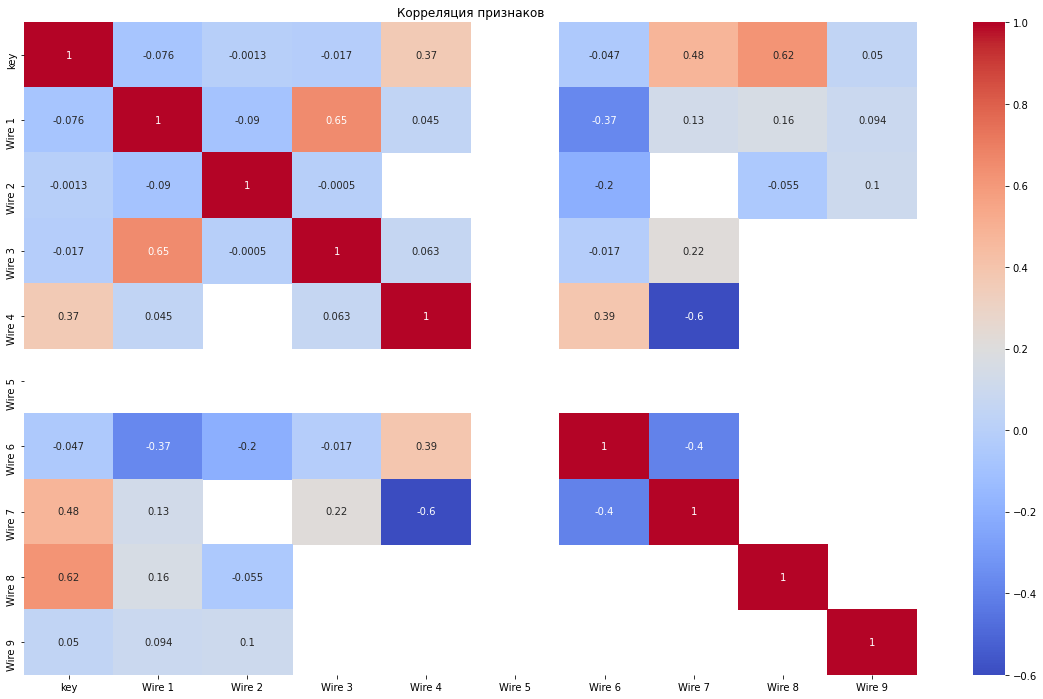

In [20]:
plt.figure(figsize=(20, 12))
plt.title('Корреляция признаков')
sns.heatmap(wire_new.corr(method='spearman'), annot = True, cmap="coolwarm")
plt.show()

данные о проволочных материалах (время)

In [21]:
wire_time_new.info()
display(wire_time_new.sample(5))
wire_time_new.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
614,650,2019-05-28 18:45:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1317,1388,2019-06-24 19:28:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,2095,2019-07-26 19:27:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2511,2644,2019-08-16 01:02:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
750,803,2019-06-03 19:54:14,2019-06-03 19:52:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN


key       3081
Wire 1    3055
Wire 2    1079
Wire 3      63
Wire 4      14
Wire 5       1
Wire 6      73
Wire 7      11
Wire 8      19
Wire 9      29
dtype: int64

Были проанализированны данные, коллинеарны не многие признаки и данные не выглядят синтетическими. Нужно некоторые таблицы объеденить по key и отобрать нужные признаки.


## Создание признаков

Добавим признак полной мощности

In [22]:
arc_new['full_power'] = (arc_new['Реактивная мощность']**2+arc_new['Активная мощность']**2)**0.5

In [23]:
sum_arc = arc_new.groupby('key').sum()

In [24]:
#sum_arc = sum_arc.drop(['Начало нагрева дугой',	'Конец нагрева дугой'],axis =1)

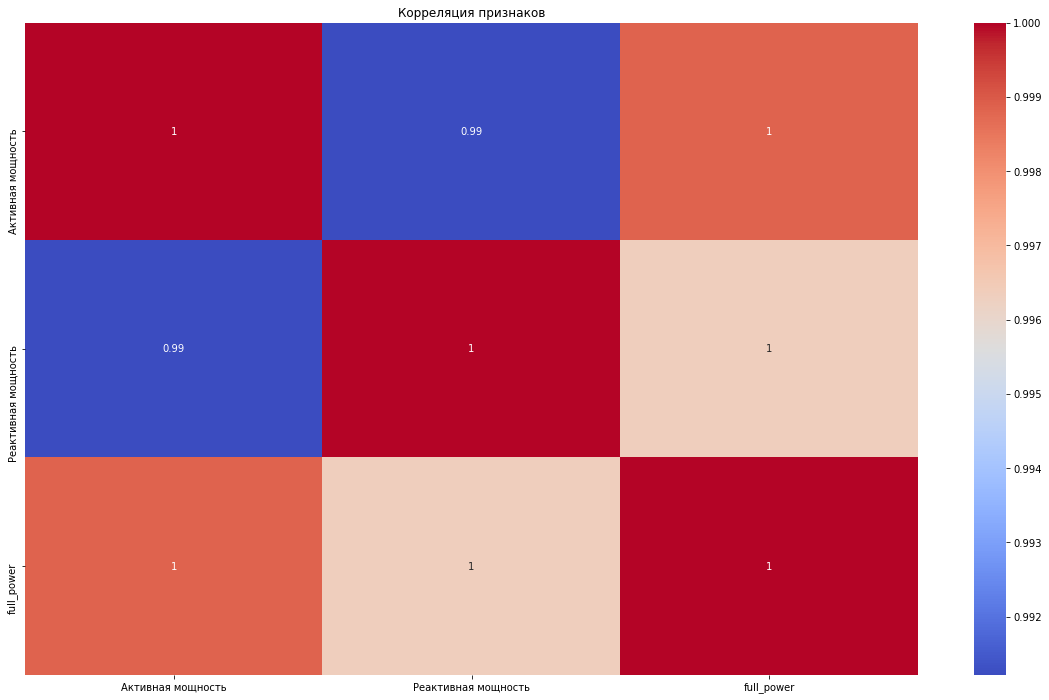

In [25]:
plt.figure(figsize=(20, 12))
plt.title('Корреляция признаков')
sns.heatmap(sum_arc.corr(method='spearman'), annot = True, cmap="coolwarm")
plt.show()

все признаки коррелируют поэтому оставим только полную мощность

Добавим конечную и начальную температуру

In [26]:
temp_agr = temp_new.groupby(['key']).first().merge(temp_new.groupby(['key']).last(), how = 'left', on = 'key')

In [27]:
temp_agr

,Время замера_x,Температура_x,Время замера_y,Температура_y
key,,,,
1,2019-05-03 11:02:04,1571.0,2019-05-03 11:30:38,1613.0
2,2019-05-03 11:34:04,1581.0,2019-05-03 11:55:09,1602.0
3,2019-05-03 12:06:44,1596.0,2019-05-03 12:35:57,1599.0
4,2019-05-03 12:39:27,1601.0,2019-05-03 12:59:47,1625.0
5,2019-05-03 13:11:03,1576.0,2019-05-03 13:36:39,1602.0
...,...,...,...,...
3237,2019-09-06 11:31:15,1569.0,2019-09-06 11:55:45,1569.0
3238,2019-09-06 12:16:15,1584.0,2019-09-06 12:34:37,1584.0
3239,2019-09-06 14:16:50,1598.0,2019-09-06 15:09:55,1598.0


In [28]:
temp_agr = temp_agr.drop(temp_agr[temp_agr['Температура_x'] == temp_agr['Температура_y']].index)

In [29]:
# проверка удаления
temp_agr

,Время замера_x,Температура_x,Время замера_y,Температура_y
key,,,,
1,2019-05-03 11:02:04,1571.0,2019-05-03 11:30:38,1613.0
2,2019-05-03 11:34:04,1581.0,2019-05-03 11:55:09,1602.0
3,2019-05-03 12:06:44,1596.0,2019-05-03 12:35:57,1599.0
4,2019-05-03 12:39:27,1601.0,2019-05-03 12:59:47,1625.0
5,2019-05-03 13:11:03,1576.0,2019-05-03 13:36:39,1602.0
...,...,...,...,...
2496,2019-08-10 11:56:48,1554.0,2019-08-10 12:25:13,1591.0
2497,2019-08-10 12:37:26,1571.0,2019-08-10 12:53:28,1589.0
2498,2019-08-10 12:58:11,1591.0,2019-08-10 13:23:31,1594.0


In [30]:
temp_new.loc[3000]

key                             534
Время замера    2019-05-23 19:02:00
Температура                  1601.0
Name: 3000, dtype: object

Добавим полное время работы с ковшом

In [31]:
time_dif = pd.to_datetime(temp_agr['Время замера_y']).dt.second  -  pd.to_datetime(temp_agr['Время замера_x']).dt.second
time_dif += pd.to_datetime(temp_agr['Время замера_y']).dt.minute*60  -  pd.to_datetime(temp_agr['Время замера_x']).dt.minute*60
time_dif += pd.to_datetime(temp_agr['Время замера_y']).dt.hour*3600  -  pd.to_datetime(temp_agr['Время замера_x']).dt.hour*3600
time_dif.name = 'time_spent'

In [32]:
temp_agr = temp_agr.merge(time_dif, left_on='key',right_index=True)

In [33]:
temp_agr = temp_agr.dropna()
temp_agr = temp_agr.drop(['Время замера_x','Время замера_y'],axis= 1)

добавим суммарные данные о проволочных материалах, общий добавленный объем и количество добавок

In [34]:
sum_w = pd.Series
for i in range(1,10):
    name = 'Wire ' + str(i) 
    j= wire_new.groupby('key').sum()[name]
    if i == 1:
        sum_w = j
    else:
        sum_w+=j
sum_w.name = 'sum_wire'
wire_new = wire_new.merge(sum_w,left_on = 'key',right_index=True)

count_w = pd.Series
for i in range(1,10):
    name = 'Wire ' + str(i) 
    j = wire_new.groupby('key').count()[name]
    if i == 1:
        count_w = j
    else:
        count_w+=j
count_w.name = 'count_wire'
wire_new = wire_new.merge(count_w,left_on = 'key',right_index=True)

In [35]:
wire_agr = wire_new[['key','sum_wire', 'count_wire']]

добавим суммарные данные о подаче сыпучих материалов, общий добавленный объем и количество добавок

In [36]:
sum_b = pd.Series
for i in range(1,16):
    name = 'Bulk ' + str(i) 
    j= bulk_new.groupby('key').sum()[name]
    if i == 1:
        sum_b = j
    else:
        sum_b+=j
sum_b.name = 'sum_bulk'
bulk_new = bulk_new.merge(sum_b,left_on = 'key',right_index=True)

count_b = pd.Series
for i in range(1,16):
    name = 'Bulk ' + str(i) 
    j = bulk_new.groupby('key').count()[name]
    if i == 1:
        count_b = j
    else:
        count_b+=j
count_b.name = 'count_bulk'
bulk_new = bulk_new.merge(count_b,left_on = 'key',right_index=True)

In [37]:
bulk_agr = bulk_new[['key','count_bulk','sum_bulk']]

объеденим данные в одну таблицу

In [38]:
all_use = temp_agr.merge(sum_arc['full_power'], how ='inner', on = 'key')
all_use = all_use.merge(bulk_agr,how = 'inner', on = 'key')
all_use = all_use.merge(wire_agr,how='inner',on= 'key')
all_use = all_use.merge(gas_new,how='inner',on= 'key')
all_use = all_use.merge(wire_new[['Wire 1','key']],how='inner',on= 'key') 
all_use = all_use.merge(bulk_new[['Bulk 14','Bulk 12','Bulk 15','key']],how='inner',on= 'key') 

In [39]:
all_use = all_use.fillna(0)

In [40]:
all_use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2292 entries, 0 to 2291
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   key            2292 non-null   int64  
 1   Температура_x  2292 non-null   float64
 2   Температура_y  2292 non-null   float64
 3   time_spent     2292 non-null   int64  
 4   full_power     2292 non-null   float64
 5   count_bulk     2292 non-null   int64  
 6   sum_bulk       2292 non-null   float64
 7   sum_wire       2292 non-null   float64
 8   count_wire     2292 non-null   int64  
 9   Газ 1          2292 non-null   float64
 10  Wire 1         2292 non-null   float64
 11  Bulk 14        2292 non-null   float64
 12  Bulk 12        2292 non-null   float64
 13  Bulk 15        2292 non-null   float64
dtypes: float64(10), int64(4)
memory usage: 268.6 KB


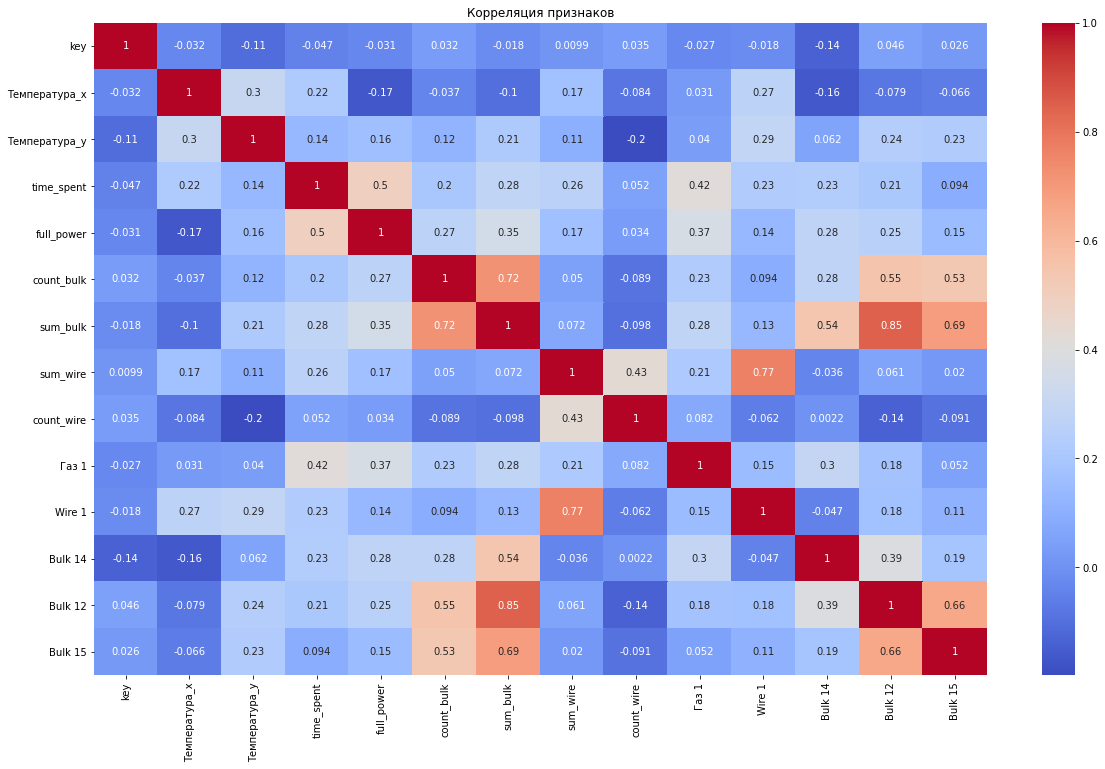

In [41]:
plt.figure(figsize=(20, 12))
plt.title('Корреляция признаков')
sns.heatmap(all_use.corr(method='spearman'), annot = True, cmap="coolwarm")
plt.show()

Полной корреляции между признаками не наблюдается, можно заметить корреляцию bulk 12 и полного Bulk, как и полной Wire и wire 1

## Обучение моделей

In [42]:
#all_use = all_use.drop(['Начало нагрева дугой','Конец нагрева дугой', 'Реактивная мощность','Время замера','Bulk 1', 'Bulk 4', 'Bulk 7'], axis = 1) #12, 9, 14

In [43]:
#all_use = all_use[['Газ 1','Wire 1','Wire 2','Bulk 15','Bulk 14','Bulk 12','Bulk 3','Активная мощность','Температура']]

In [44]:
all_use

,key,Температура_x,Температура_y,time_spent,full_power,count_bulk,sum_bulk,sum_wire,count_wire,Газ 1,Wire 1,Bulk 14,Bulk 12,Bulk 15
0,1,1571.0,1613.0,1714,3.718736,4,553.0,60.059998,1,29.749986,60.059998,150.0,206.0,154.0
1,2,1581.0,1602.0,1265,2.588349,4,582.0,96.052315,1,12.555561,96.052315,149.0,206.0,154.0
2,3,1596.0,1599.0,1753,5.019223,4,544.0,91.160157,1,28.554793,91.160157,152.0,205.0,153.0
3,4,1601.0,1625.0,1220,3.400038,4,595.0,89.063515,1,18.841219,89.063515,153.0,207.0,154.0
4,5,1576.0,1602.0,1536,2.816980,4,584.0,98.352796,2,5.413692,89.238236,151.0,203.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2287,2495,1570.0,1591.0,1380,3.868721,5,719.0,89.150879,1,7.125735,89.150879,129.0,256.0,223.0
2288,2496,1554.0,1591.0,1705,5.070316,5,796.0,114.179527,1,9.412616,114.179527,129.0,256.0,226.0
2289,2497,1571.0,1589.0,962,4.360918,4,665.0,103.134723,2,6.271699,94.086723,124.0,230.0,226.0
2290,2498,1591.0,1594.0,1520,3.909917,5,733.0,118.110717,1,14.953657,118.110717,129.0,206.0,207.0


In [45]:
target = all_use['Температура_y']
features = all_use.drop(['Температура_y','key'],axis = 1) 

In [46]:
target_train, target_test, features_train, features_test = train_test_split(target,features, test_size = 0.1)

In [47]:
model = CatBoostRegressor(verbose = 0)

In [48]:
print(cross_val_score(model, features_train, target_train, cv=5,scoring = 'neg_mean_absolute_error'))

[-7.34106796 -6.64871305 -7.13680959 -6.65475672 -7.57896743]


In [49]:
model = LinearRegression()

In [50]:
print(cross_val_score(model, features_train, target_train, cv=5,scoring = 'neg_mean_absolute_error'))

[-7.62137078 -6.88376732 -7.20789569 -6.97481123 -7.31956128]


In [51]:
model = RandomForestRegressor()

In [52]:
print(cross_val_score(model, features_train, target_train, cv=5,scoring = 'neg_mean_absolute_error'))

[-7.35496368 -6.80876513 -7.24667476 -6.74961165 -7.30157767]


Лучше всего показали себя модели CatBoost и RandomForestRegressor

## Подбор гиперпараметров

Рассмотрим подбор гиперпараметров для RandomForestRegressor

In [53]:
parameters = {'n_estimators':[50,100,150],'max_depth' :(None,4,8)}

In [54]:
grid_search = GridSearchCV(model, parameters,return_train_score=True,scoring = 'neg_mean_absolute_error')
grid_search.fit(features_train,target_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': (None, 4, 8),
                         'n_estimators': [50, 100, 150]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [55]:
grid_search.best_estimator_, grid_search.best_score_

(RandomForestRegressor(max_depth=8), -7.064462648511741)

Для теста была выбрана модель CatBoostRegressor

## Тестирование

In [56]:
model = CatBoostRegressor(verbose = 0)

In [57]:
model.fit(features_train,target_train)
predict = model.predict(features_test)
print(mean_absolute_error(target_test,predict))

6.581204505586839


ошибка меньше 6.8

In [58]:
feature_names = features_train.columns
importances = model.feature_importances_
importances = pd.Series(importances, index=feature_names)

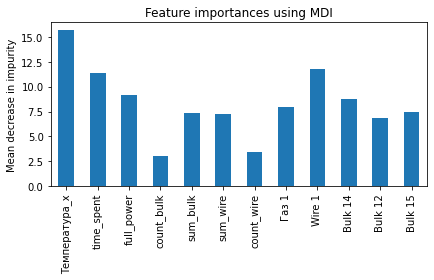

In [59]:
fig, ax = plt.subplots()
importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

самый важный признак начальная температура, но другие признаки кроме количство сыпучих материалов и количство проволочных материалов тоже важны


## Вывод

В данной работе была рассмотрена часть процесса по обработке стали
В частоности в данной работе, была произведена работа с данными, создание общей таблицы признаков с добавлением новых признаков. Обучены три модели  н сделанныха данны, лучше всего показали результаты модели Catboost и RandomForestRegressor. Произведен
п Подбор гиперпараметров и анализ результатов обучен модели RandomForestRegressor. Которая и была выбрана как наилучшая. Результатом работы модели на тестовой выборке является средняя ошибка в 6.8  градусов, что я считаю приемлимой погрещностью при работе с тысячами градусов.

Какие пункты плана были выполнены, а какие — нет. Почему?
Какие трудности возникли и как вы их преодолели?
Какие ключевые шаги в решении задачи вы выделили?
Какие признаки использовали для обучения модели и какая предобработка этих признаков была выполнена?
Какая ваша итоговая модель, какие у неё гиперпараметы и какое качество?

## Отчет

В данной работе были выполнены пункты:
 1. Шаг создание общей таблицы признаков. Объединяя таблицы и сохраняя нужные признаки.
 2. Обучение пробных моделей на данных.
 3. Подбор гиперпараметров и анализ результатов обучения.
 4. Отбор лучшей модели
 
 Данные шаги не вызвали особых трудностей благодаря предыдущим проектам. Использовались уже знакомые техники и приемы.
 
Так же по совету Тимлида был добавлен пункт анализ важности факторов у модели-победителя.


Во время работы возникли трудности с адектватным выделением признаков, я потратил много времени чтобы понять какую температуру нужно оставить а какую убрать,
так же возникла небольшая трудность при вычислении количества добавок как сыпучих материалов так и проволчных, но в итоге эти проблемы были решены.

Ключевые шаги в данной задаче являются анализ данных и их предобработка, именно эти разделы потребовали больше всего внимания и размышлений, так же стоит отметить выбор модели и подбор гиперпараметров.

Итоговая модель CatBoostRegressor(verbose = 0), данная модель показала результат 6.236 по метрике МАЕ, что находится ниже 6.8

Признаки на которых обучалась модель состоят из
1. Температура_x - начальная температура ковша
2. time_spent - время от начального измерения температуры до конечного измерения
3. full_power - полная затраченная мощность получена по формуле (P^2 + Q^2)^0.5, где P - активная мощность а Q - реактивная мощность 
4. count_bulk - количество загрузок сыпучих материалов
5. sum_bulk - суммарный объем сыпучих материалов
6. sum_wire - суммарный объем проволочных материалов
7. count_wire - количество загрузок проволочных материалов
8. Газ 1 - данные о продувке сплава газом
9. Wire 1 - добвленные проволчные материалы под номером 1 
10. Bulk 14 - добвленные сыпучие материалы под номером 14 
11. Bulk 12 - добвленные сыпучие материалы под номером 12
12. Bulk 15 - добвленные сыпучие материалы под номером 15 


Признаки count_bulk и count_wire были получены подсчетом количества загрузки материалов под одиним ключем

Признаки sum_bulk sum_wire были получены путем складывания всех объемов добавленных материалов под одиним ключем

time_spent был получен переводом времени последнего измерения в секунды и вычетом из него временем первого измерения тоже в секундах

Сама модель CatBoostRegressor задавалась без гиперпараметров, для улучшения результатов можно увеличить количество ковшей, так же возможно стоит добавить признак средней температуры.  

Хочется так же отметить что ошибка около 6 градусов для значений выраженных в тысячах достаточно хороший результат, это составляет около 0.42 процента